<a href="https://colab.research.google.com/github/cuzmyk/data_mining/blob/main/pr6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №6. Метод K-ближайших соседей

# Базовый алгоритм KNN

## KNN для классификации

### Получение данных

Будем работать с набором данным `iris` из `sklearn`.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt


data = load_iris()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 1. KNN из sklearn

#### 1.1. Разбейте данные на обучение и тест

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

#### 1.2. Обучите модель KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### 1.3. Проверьте качество работы модели

In [ ]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели при K=3: {accuracy:.2f}")

Точность модели при K=3: 0.97


#### 1.4. Поэкспериментируйте с количеством соседей

1. Обучите модели с разным кол-вом соседей
2. Посчитайте метрику на тестовой выборке
3. Соберите данные в таблицу/график для наглядности
4. Выберите самое оптимальное значение $k$

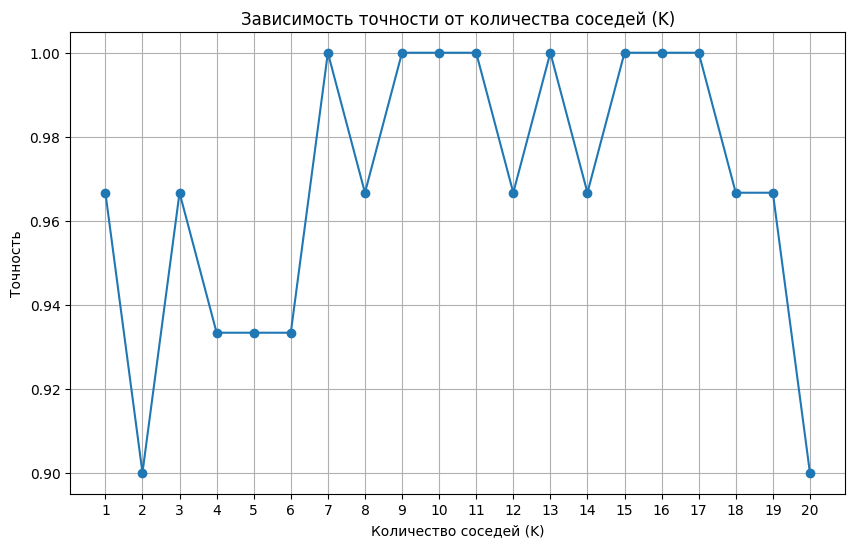

Оптимальное значение K: 7, точность: 1.00


In [ ]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title("Зависимость точности от количества соседей (K)")
plt.xlabel("Количество соседей (K)")
plt.ylabel("Точность")
plt.xticks(k_values)
plt.grid()
plt.show()

optimal_k = k_values[accuracies.index(max(accuracies))]
print(f"Оптимальное значение K: {optimal_k}, точность: {max(accuracies)}")

### 2. KNN рукописный

#### 2.1. Возьмите два случайных тестовых объектов

In [ ]:
y_test = pd.Series(y_test, index=X_test.index)

random_indices = np.random.choice(X_test.index, size=2, replace=False)
test_objects = X_test.loc[random_indices]
true_labels = y_test.loc[random_indices]

print("Случайно выбранные тестовые объекты:")
print(test_objects)
print(f"Их настоящие метки классов: {true_labels.tolist()}")


Случайно выбранные тестовые объекты:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
134                6.1               2.6                5.6               1.4
126                6.2               2.8                4.8               1.8
Их настоящие метки классов: [2, 2]


#### 2.2. Посчитайте для каждого расстояния до всех объектов из обучения

In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

distances = []
for test_object in test_objects.values:
    dists = [euclidean_distance(test_object, train_object) for train_object in X_train.values]
    distances.append(dists)

print("Расстояния до всех объектов из обучающей выборки рассчитаны.")



Расстояния до всех объектов из обучающей выборки рассчитаны.


#### 2.3. Выберите топ $k$ соседей для каждого объекта

In [ ]:
k = 3

neighbors = []
for dists in distances:
    nearest_indices = np.argsort(dists)[:k]
    neighbors.append(nearest_indices)

print(f"Индексы ближайших {k} соседей для каждого объекта:")
print(neighbors)



Индексы ближайших 3 соседей для каждого объекта:
[array([66, 95, 30]), array([ 58,  46, 116])]


#### 2.4. Выведите финальное предсказание для двух объектов основываясь на соседях

In [ ]:
predictions = []
for i, nearest_indices in enumerate(neighbors):
    neighbor_labels = y_train[nearest_indices]  # Работаем с numpy массивом
    prediction = np.bincount(neighbor_labels).argmax()  # Метка класса с наибольшей частотой
    predictions.append(prediction)

print(f"Финальные предсказания для тестовых объектов: {predictions}")


Финальные предсказания для тестовых объектов: [2, 2]


#### 2.5. Сравните с настоящими целевыми значениями этих двух объектов

In [ ]:
for i, (pred, true) in enumerate(zip(predictions, true_labels)):
    print(f"Тестовый объект {i + 1}:")
    print(f"  Настоящая метка: {true}")
    print(f"  Предсказанная метка: {pred}")
    print(f"  {'Совпадает' if pred == true else 'Не совпадает'}")


Тестовый объект 1:
  Настоящая метка: 2
  Предсказанная метка: 2
  Совпадает
Тестовый объект 2:
  Настоящая метка: 2
  Предсказанная метка: 2
  Совпадает


## KNN для регрессии

### Получение данных


Будем работать с набором данных для задачи регрессии - данные по предсказанию стоимости недвижимости.

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np


data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### KNN из sklearn

#### 3.1. Разбейте данные на обучение и тест

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Размер обучающего набора: {X_train.shape}")
print(f"Размер тестового набора: {X_test.shape}")



Размер обучающего набора: (14448, 8)
Размер тестового набора: (6192, 8)


Затем нормализуйте данные:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)

X_train = pd.DataFrame(mms.transform(X_train[X_train.columns]), columns=X_train.columns)
X_test = pd.DataFrame(mms.transform(X_test[X_train.columns]), columns=X_train.columns)


#### 3.2. Обучите модель KNN


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsRegressor()

#### 3.3. Проверьте качество работы модели

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse}")

Среднеквадратичная ошибка (MSE): 0.4015197569508185


#### 3.4. Поэкспериментируйте с количеством соседей

1. Обучите модели с разным кол-вом соседей
2. Посчитайте метрику на тестовой выборке
3. Соберите данные в таблицу/график для наглядности
4. Выберите самое оптимальное значение $k$

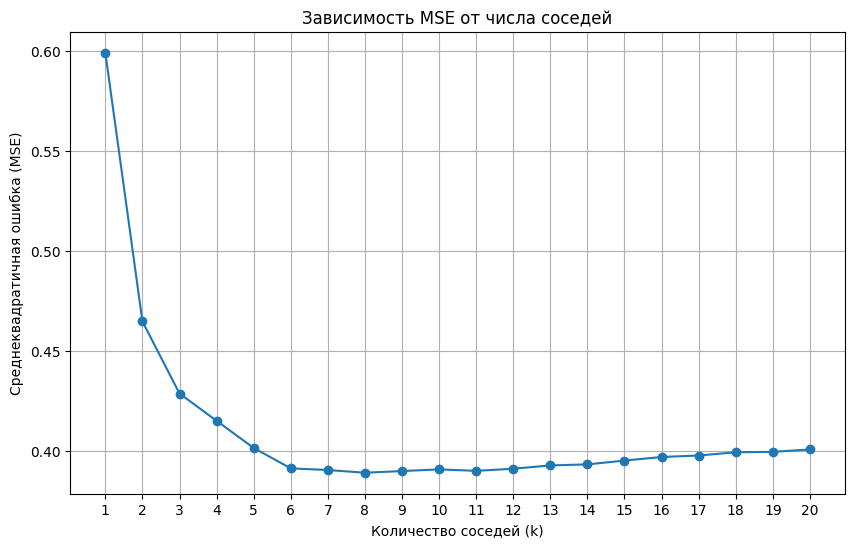

Оптимальное количество соседей: 8, MSE: 0.39


In [ ]:
neighbors = range(1, 21)
mses = []

for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(neighbors, mses, marker='o')
plt.title('Зависимость MSE от числа соседей')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Среднеквадратичная ошибка (MSE)')
plt.xticks(neighbors)
plt.grid(True)
plt.show()

optimal_k = neighbors[mses.index(min(mses))]
print(f"Оптимальное количество соседей: {optimal_k}, MSE: {min(mses)}")


### 4. KNN рукописный

#### 4.1. Возьмите два случайных тестовых объектов

In [ ]:
random_indices = np.random.choice(X_test.index, size=2, replace=False)
test_objects = X_test.loc[random_indices]
true_labels = y_test[random_indices]

print("Случайно выбранные тестовые объекты:")
print(test_objects)
print(f"Их настоящие метки цен: {true_labels.tolist()}")


Случайно выбранные тестовые объекты:
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
2307  0.232307  0.725490   0.02572   0.028130    0.071695  0.001710  0.525532   
2606  0.292955  0.509804   0.03456   0.026882    0.079935  0.001836  0.529787   

      Longitude  
2307   0.210159  
2606   0.241036  
Их настоящие метки цен: [2.656, 2.435]


#### 4.2. Посчитайте для каждого расстояния до всех объектов из обучения

In [ ]:
from sklearn.metrics import pairwise_distances

distances = pairwise_distances(test_objects, X_train, metric='euclidean')

print(f"Расстояния от тестовых объектов до объектов обучающей выборки:\n{distances}")


Расстояния от тестовых объектов до объектов обучающей выборки:
[[0.57044392 0.80275105 0.46638138 ... 0.53806121 0.4703254  0.29082675]
 [0.57171689 0.72471073 0.37152209 ... 0.55817241 0.24662962 0.51584592]]


#### 4.3. Выберите топ $k$ соседей для каждого объекта

In [ ]:
K = 5
top_k_neighbors = np.argsort(distances, axis=1)[:, :K]

print(f"Индексы топ {K} ближайших соседей для каждого тестового объекта:\n{top_k_neighbors}")


Индексы топ 5 ближайших соседей для каждого тестового объекта:
[[ 7121 10592 14059  4646 11358]
 [ 9325  2234  2591   606  9375]]


#### 4.4. Выведите финальное предсказание для двух объектов основываясь на соседях

In [ ]:
neighbor_labels = [y_train[neighbors] for neighbors in top_k_neighbors]

predictions = [np.mean(labels) for labels in neighbor_labels]

print(f"Предсказания для двух тестовых объектов: {predictions}")


Предсказания для двух тестовых объектов: [3.5774, 2.2312]


#### 4.5. Сравните с настоящими целевыми значениями этих двух объектов

In [ ]:
predictions_array = np.array(predictions)
true_labels_array = np.array(true_labels)

deviation = np.abs(predictions_array - true_labels_array)

print(f"Отклонение предсказаний от истинных значений: {deviation}")


Отклонение предсказаний от истинных значений: [0.9214 0.2038]


Предсказания отклоняются от истины, но не так сильно, они довольно близки.

# Weighted KNN

## KNN для классификации

### Получение данных

Будем работать с набором данным `iris` из `sklearn`.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd


data = load_iris()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Выберите только 0 и 3 признак (sepal length (cm) и petal width (cm))

In [ ]:
X_selected = X.iloc[:, [0, 3]]

### Визуализируйте ваши данные на графике

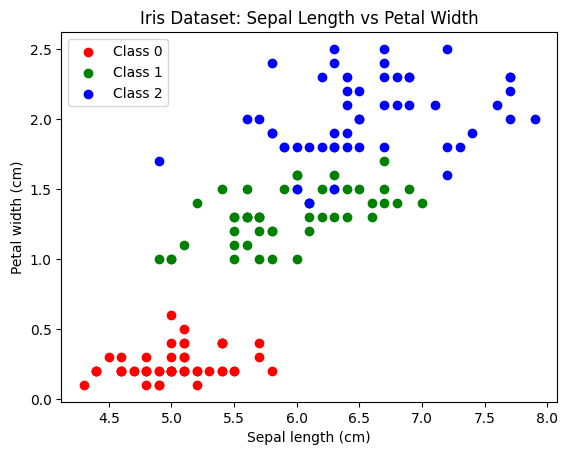

In [ ]:
plt.scatter(X_selected[y == 0].iloc[:, 0], X_selected[y == 0].iloc[:, 1], color='red', label='Class 0')
plt.scatter(X_selected[y == 1].iloc[:, 0], X_selected[y == 1].iloc[:, 1], color='green', label='Class 1')
plt.scatter(X_selected[y == 2].iloc[:, 0], X_selected[y == 2].iloc[:, 1], color='blue', label='Class 2')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()
plt.title('Iris Dataset: Sepal Length vs Petal Width')
plt.show()

### 1. KNN из sklearn

#### 1.1. Разбейте данные на обучение и тест

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


#### 1.2. Обучите модель KNN на 50 соседях

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)



#### 1.3. Проверьте качество работы модели

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

Точность модели: 0.9333333333333333


#### 1.4. Возьмите один случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [ ]:
import numpy as np

random_index = np.random.choice(len(X_test))
test_object = X_test.iloc[random_index]

distances, indices = knn.kneighbors([test_object])

print(f"Расстояния до ближайших соседей: {distances}")
print(f"Индексы ближайших соседей: {indices}")


Расстояния до ближайших соседей: [[0.1        0.1        0.14142136 0.14142136 0.14142136 0.2
  0.2        0.2        0.2236068  0.2236068  0.2236068  0.2236068
  0.28284271 0.3        0.3        0.3        0.31622777 0.31622777
  0.36055513 0.36055513 0.41231056 0.41231056 0.42426407 0.42426407
  0.42426407 0.4472136  0.4472136  0.5        0.5        0.50990195
  0.53851648 0.53851648 0.53851648 0.53851648 0.56568542 0.56568542
  0.58309519 0.58309519 0.6        0.63245553 0.63245553 0.64031242
  0.7        0.70710678 0.70710678 0.72801099 0.72801099 0.76157731
  0.78102497 0.78102497]]
Индексы ближайших соседей: [[ 16  73  63  90  79  39   6  68 110 115  11  62 111  86  80  81  30 107
   17  42  18   5 109  59 113  92  50  12 118   2  54  20 108  44  10  43
   87  36  22  95  34  25 105  40  88  47  65  93  97 112]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### 1.5. Выберите топ  k  соседей


In [ ]:
top_k_neighbors = indices[0]
print(f"Топ-50 ближайших соседей: {top_k_neighbors}")

Топ-50 ближайших соседей: [ 16  73  63  90  79  39   6  68 110 115  11  62 111  86  80  81  30 107
  17  42  18   5 109  59 113  92  50  12 118   2  54  20 108  44  10  43
  87  36  22  95  34  25 105  40  88  47  65  93  97 112]


#### 1.6. Выведите финальное предсказание для этого объекта

In [ ]:
neighbor_labels = y_train[top_k_neighbors]

# класс с наибольшей частотой
final_prediction = np.bincount(neighbor_labels).argmax()
print(f"Финальное предсказание для тестового объекта: {final_prediction}")

Финальное предсказание для тестового объекта: 1


#### 1.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [ ]:
true_label = y_test[random_index]
print(f"Настоящее значение: {true_label}")

sklearn_prediction = knn.predict([test_object])[0]
print(f"Предсказание модели sklearn: {sklearn_prediction}")


Настоящее значение: 1
Предсказание модели sklearn: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Ваш код здесь


#### 1.8 Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей

<ipython-input-89-2892295d102e>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(test_object[0], test_object[1], color='red', label='Test Point')
<ipython-input-89-2892295d102e>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([test_object[0], neighbor[0]], [test_object[1], neighbor[1]], color='blue', alpha=0.5)


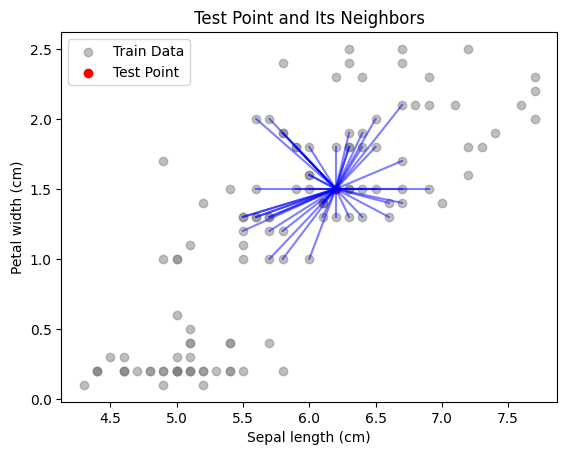

In [ ]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], color='gray', label='Train Data', alpha=0.5)

plt.scatter(test_object[0], test_object[1], color='red', label='Test Point')

for neighbor in X_train.iloc[top_k_neighbors, :].values:
    plt.plot([test_object[0], neighbor[0]], [test_object[1], neighbor[1]], color='blue', alpha=0.5)

plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()
plt.title('Test Point and Its Neighbors')
plt.show()


### 2. Weighted KNN

#### 2.1. Обучите модель "взвешенный KNN" по дистанции

In [ ]:
knn_weighted = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_weighted.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

#### 2.2. Проверьте качество работы модели


In [ ]:
y_pred_weighted = knn_weighted.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_weighted)
print(f"Точность модели с взвешенными соседями: {accuracy}")

Точность модели с взвешенными соседями: 0.9333333333333333


#### 2.3. Возьмите тот же случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [ ]:
random_idx = np.random.randint(0, len(X_test))
test_object = X_test.iloc[random_idx]

distances, indices = knn_weighted.kneighbors([test_object])

print(f"Расстояния до всех объектов для тестового объекта: {distances}")

Расстояния до всех объектов для тестового объекта: [[0.1        0.14142136 0.2236068  0.31622777 0.31622777]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### 2.4. Выберите топ  k  соседей


In [ ]:
top_k_neighbors = indices[0]
print(f"Индексы ближайших соседей: {top_k_neighbors}")


Индексы ближайших соседей: [  1 117  41 114  14]


#### 2.5. Рассчитайте вес для каждого соседа

In [ ]:
weights = 1 / distances[0]
print(f"Веса для каждого соседа: {weights}")

Веса для каждого соседа: [10.          7.07106781  4.47213595  3.16227766  3.16227766]


#### 2.6. Выведите финальное предсказание для этого объекта

In [ ]:
final_prediction_weighted = knn_weighted.predict([test_object])
print(f"Финальное предсказание для тестового объекта (взвешенное): {final_prediction_weighted[0]}")


Финальное предсказание для тестового объекта (взвешенное): 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### 2.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [ ]:
true_label = y_test[random_idx]
print(f"Настоящее значение для тестового объекта: {true_label}")


Настоящее значение для тестового объекта: 0


In [ ]:
print(f"Предсказание модели: {final_prediction_weighted[0]}")

Предсказание модели: 0


#### 2.8. Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей по удаленности

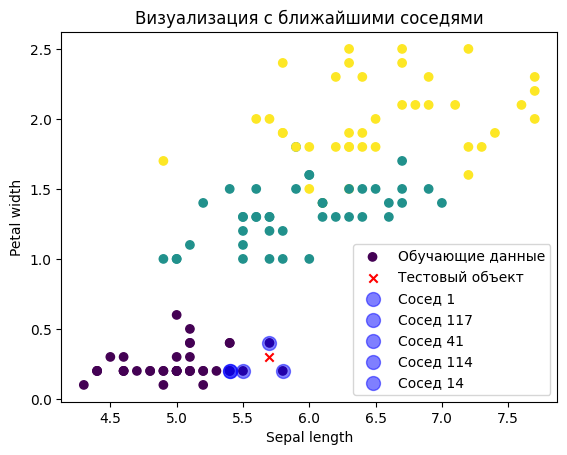

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap='viridis', label='Обучающие данные')

plt.scatter(test_object.iloc[0], test_object.iloc[1], color='red', marker='x', label='Тестовый объект')

for idx in top_k_neighbors:
    plt.scatter(X_train.iloc[idx, 0], X_train.iloc[idx, 1], color='blue', marker='o', s=100, alpha=0.5, label=f'Сосед {idx}')

plt.xlabel('Sepal length')
plt.ylabel('Petal width')
plt.legend()
plt.title("Визуализация с ближайшими соседями")
plt.show()


### 3. Еще одна задача классификации

### Получение данных

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
import pandas as pd


data = fetch_olivetti_faces(shuffle=True, random_state=9)

X = pd.DataFrame(data['data'])
y = data['target']

X.head()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.723140,0.710744,0.714876,0.731405,0.735537,0.752066,0.772727,0.793388,0.814050,0.834711,...,0.793388,0.904959,0.549587,0.409091,0.491736,0.487603,0.471074,0.483471,0.475207,0.475207
1,0.289256,0.157025,0.148760,0.190083,0.169421,0.194215,0.404959,0.607438,0.669421,0.677686,...,0.438017,0.400826,0.421488,0.429752,0.433884,0.425620,0.438017,0.438017,0.210744,0.206612
2,0.586777,0.595041,0.681818,0.694215,0.714876,0.698347,0.714876,0.727273,0.743802,0.739669,...,0.495868,0.380165,0.400826,0.330579,0.148760,0.119835,0.123967,0.115702,0.119835,0.107438
3,0.235537,0.351240,0.479339,0.545455,0.566116,0.566116,0.595041,0.607438,0.619835,0.623967,...,0.169421,0.198347,0.202479,0.214876,0.202479,0.214876,0.214876,0.214876,0.210744,0.206612
4,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893


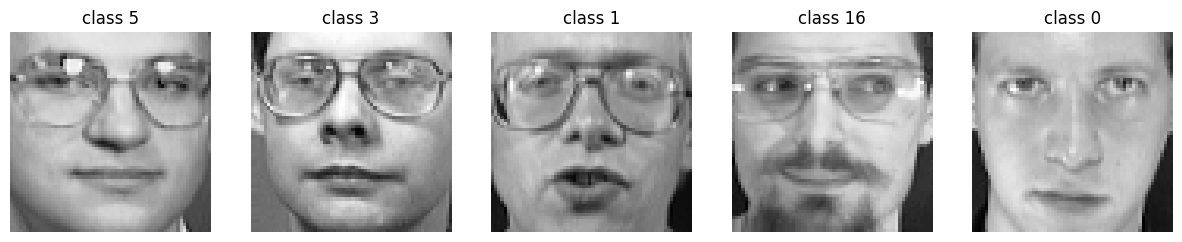

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 5, figsize=(15, 8))

for i in range(0, 5):
    ax[i].imshow(X.iloc[i].values.reshape((64, 64)), cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(f'class {y[i]}')

plt.show()

In [ ]:
y

array([ 5,  3,  1, 16,  0,  1, 12,  9, 26, 37, 20,  5, 10, 27, 10, 34, 13,
       26, 17, 31,  9,  7, 31, 37, 31, 35, 18, 29, 29,  4, 21, 20, 23,  7,
        9, 18, 22,  2,  1, 39, 36,  8, 34, 32,  3, 20,  3,  9, 37, 32, 34,
       15,  9, 16, 36, 16, 13,  7, 29,  6, 13,  4, 16,  0,  8,  1, 25,  3,
       18, 29,  8, 35,  2, 25, 21, 31, 35, 23, 30, 28,  4, 10, 11, 27, 29,
       39,  5, 12, 29, 26, 15,  2, 39,  6, 30, 37, 25, 32, 35, 24, 15, 24,
        2, 19, 22,  0, 38,  5, 22, 28,  6, 38,  6,  3, 33, 12, 36,  8, 27,
       19, 25, 36, 10, 37,  9, 33, 10, 28, 32, 34, 17, 23, 19, 24, 27,  3,
       39, 30,  3,  7,  3, 30, 12, 21, 17, 14, 35, 21, 19,  5, 32, 16, 19,
        8, 33, 14, 17, 15, 22, 38, 15, 18,  7, 14, 28, 39, 23, 36, 28, 10,
       39, 36, 37, 10, 34, 25, 18, 13, 19, 33, 33, 13, 26,  9, 13, 34, 24,
        0, 30, 23,  2, 22,  9, 11,  7, 35, 19, 26, 32, 11,  7,  7,  0,  4,
        0,  2,  0, 26, 21, 14,  4, 32,  1, 23, 16,  0,  7, 14, 16, 15, 39,
       17, 33, 30, 37, 17

### 3.1. KNN из sklearn

#### 3.1.1. Разбейте данные на обучение и тест

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(320, 4096) (80, 4096)


#### 3.1.2. Обучите модель KNN на 50 соседях

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)

knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=50)

#### 3.1.3. Проверьте качество работы модели


In [ ]:
accuracy = knn.score(X_test, y_test)

print(accuracy)



0.3


### 3.2. Weighted KNN

#### 3.2.1. Обучите модель взвешенный KNN по дистанции

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_weighted = KNeighborsClassifier(n_neighbors=50, weights='distance')

knn_weighted.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=50, weights='distance')

#### 3.2.2. Проверьте качество работы модели


In [ ]:
accuracy_weighted = knn_weighted.score(X_test, y_test)

print(accuracy_weighted)


0.5375


### 3.3. Custom Weighted KNN

#### 3.3.1. Напишите свою функцию подсчета весов по дистанции

(Можете выбрать любой подход)

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def custom_weighted_knn(X_train, X_test, k):
    distances = euclidean_distances(X_test, X_train)

    nearest_neighbors = np.argsort(distances, axis=1)[:, :k]

    weights = 1 / (distances[np.arange(distances.shape[0])[:, None], nearest_neighbors] + 1e-5)

    return nearest_neighbors, weights

#### 3.3.2. Обучите модель взвешенный KNN по написанной функции выше

In [ ]:
def predict_with_custom_knn(X_train, X_test, y_train, k):
    nearest_neighbors, weights = custom_weighted_knn(X_train, X_test, k)

    predictions = []

    for i in range(X_test.shape[0]):
        neighbor_classes = y_train[nearest_neighbors[i]]

        weighted_votes = np.zeros(np.max(y_train) + 1)
        for j, weight in zip(neighbor_classes, weights[i]):
            weighted_votes[j] += weight

        predictions.append(np.argmax(weighted_votes))

    return np.array(predictions)

k = 50
y_pred_custom = predict_with_custom_knn(X_train, X_test, y_train, k)


#### 3.3.3. Проверьте качество работы модели


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_custom = accuracy_score(y_test, y_pred_custom)
print(f"Точность кастомной модели KNN: {accuracy_custom:.4f}")



Точность кастомной модели KNN: 0.5375


## KNN для регрессии

### Получение данных


Будем работать с набором данных для задачи регрессии - данные по предсказанию стоимости недвижимости.

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np


data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

### Возьмите только признак MedInc и 1000 первых строк

In [ ]:
X = X[['MedInc']].iloc[:1000]
y = y[:1000]

X.head()

,MedInc
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462


### Отрисуйте данные на графике

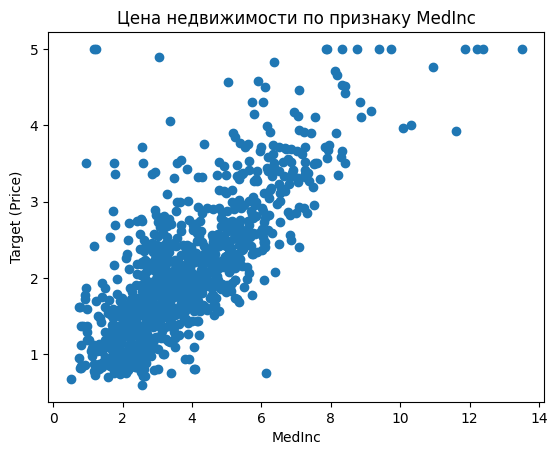

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X['MedInc'], y)
plt.xlabel('MedInc')
plt.ylabel('Target (Price)')
plt.title('Цена недвижимости по признаку MedInc')
plt.show()


### 4. KNN из sklearn

#### 4.1. Разбейте данные на обучение и тест

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 4.2. Обучите модель KNN на 100 соседях


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=100)

#### 4.3. Проверьте качество работы модели


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.2539907243501753
R^2 Score: 0.6506743704497873


#### 4.4. Возьмите один случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [ ]:
import random

random_index = random.randint(0, X_test.shape[0] - 1)
x_random = X_test.iloc[random_index].values.reshape(1, -1)

distances, indices = knn.kneighbors(x_random)

print(f'Расстояния до ближайших соседей: {distances}')
print(f'Индексы ближайших соседей: {indices}')


Расстояния до ближайших соседей: [[0.002  0.002  0.0054 0.0089 0.0092 0.0181 0.0192 0.0226 0.0298 0.036
  0.0485 0.0496 0.0545 0.0587 0.0596 0.061  0.0632 0.0645 0.065  0.07
  0.0722 0.0873 0.0962 0.1065 0.1106 0.117  0.1196 0.1216 0.123  0.1254
  0.1351 0.1448 0.1486 0.1527 0.1538 0.1556 0.1565 0.1587 0.1654 0.1696
  0.1782 0.1795 0.1795 0.1806 0.1808 0.1865 0.19   0.2016 0.202  0.2038
  0.2094 0.2113 0.2123 0.2163 0.2212 0.2301 0.2319 0.2337 0.2391 0.2441
  0.2457 0.249  0.252  0.2538 0.2788 0.2798 0.2958 0.3049 0.3072 0.3125
  0.3163 0.317  0.318  0.3186 0.3194 0.3205 0.3243 0.3254 0.3299 0.3393
  0.3413 0.3445 0.3462 0.3527 0.3551 0.3563 0.3576 0.3632 0.3646 0.3653
  0.3702 0.373  0.383  0.3888 0.3939 0.3954 0.3966 0.3966 0.4087 0.4087]]
Индексы ближайших соседей: [[259 738 779 664 262 109 422 688 615 255 370 722 455  80 546 104 212 144
  569 223 732 517 541 750  13 461 484 105 777 321 398 199 124  88 473 272
  276  72 290 366 622 336 154 549 240 503 130 635 639   4 194 696 496  83

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


#### 4.5. Выберите топ  k  соседей


In [ ]:
top_k_neighbors = X_train.iloc[indices[0]]
top_k_labels = y_train[indices[0]]

print(f'Признаки ближайших соседей:\n{top_k_neighbors}')
print(f'Целевые значения ближайших соседей:\n{top_k_labels}')


Признаки ближайших соседей:
     MedInc
412  4.5893
273  4.5893
661  4.5859
391  4.5824
598  4.6005
..      ...
945  4.9867
980  4.9879
903  4.1947
641  5.0000
911  5.0000

[100 rows x 1 columns]
Целевые значения ближайших соседей:
[2.901 1.635 1.872 2.561 2.316 2.293 2.147 1.772 1.514 1.91  2.398 1.944
 2.17  2.068 2.326 1.75  1.736 2.074 2.318 2.284 2.067 2.56  2.006 2.403
 1.741 1.909 1.987 2.213 1.938 1.891 2.062 2.168 2.045 2.573 1.935 2.917
 2.435 1.97  1.58  2.126 2.917 3.147 1.563 2.235 2.171 3.518 2.419 1.906
 1.869 2.385 2.092 1.964 1.883 1.619 1.883 1.86  2.234 2.22  2.791 3.75
 1.63  2.686 2.312 2.418 1.644 2.866 2.188 2.202 2.134 3.325 1.853 3.468
 1.807 2.469 2.138 2.173 2.103 2.563 2.613 3.134 1.926 2.212 2.277 1.923
 2.238 1.563 2.471 2.06  2.73  2.75  2.28  3.35  1.25  2.415 1.793 1.817
 2.294 2.227 2.647 2.876]


#### 4.6. Выведите финальное предсказание для этого объекта

In [ ]:
predicted_value = np.mean(top_k_labels)
print(f'Финальное предсказание для выбранного объекта: {predicted_value}')

Финальное предсказание для выбранного объекта: 2.23766


#### 4.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [ ]:
true_value = y_test[random_index]
print(f'Настоящее значение: {true_value}')
print(f'Предсказание модели sklearn: {y_pred[random_index]}')
print(f'Предсказание по среднему ближайших соседей: {predicted_value}')


Настоящее значение: 1.776
Предсказание модели sklearn: 2.23766
Предсказание по среднему ближайших соседей: 2.23766


In [ ]:
# Ваш код здесь


#### 4.8 Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей

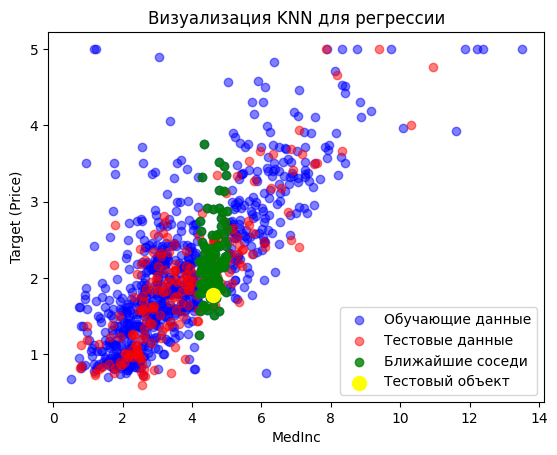

In [ ]:
plt.scatter(X_train['MedInc'], y_train, color='blue', label='Обучающие данные', alpha=0.5)
plt.scatter(X_test['MedInc'], y_test, color='red', label='Тестовые данные', alpha=0.5)

plt.scatter(top_k_neighbors['MedInc'], top_k_labels, color='green', label='Ближайшие соседи', alpha=0.8)

plt.scatter(X_test.iloc[random_index]['MedInc'], y_test[random_index], color='yellow', s=100, label='Тестовый объект')

plt.xlabel('MedInc')
plt.ylabel('Target (Price)')
plt.legend()
plt.title('Визуализация KNN для регрессии')
plt.show()


### 5. Weighted KNN

#### 5.1. Обучите модель взвешенный KNN по дистанции

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X[['MedInc']], y, test_size=0.2, random_state=42)

knn_weighted = KNeighborsRegressor(n_neighbors=100, weights='distance')
knn_weighted.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=100, weights='distance')

#### 5.2. Проверьте качество работы модели


In [ ]:
y_pred_weighted = knn_weighted.predict(X_test)
mse = mean_squared_error(y_test, y_pred_weighted)
print(f'MSE модели с взвешенными соседями: {mse}')


MSE модели с взвешенными соседями: 0.3078943245850838


#### 5.3. Возьмите тот же случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [ ]:
random_index = np.random.randint(0, X_test.shape[0])
test_point = X_test.iloc[random_index]

distances, indices = knn_weighted.kneighbors([test_point])

print(f'Расстояния до ближайших соседей: {distances}')
print(f'Индексы ближайших соседей: {indices}')


Расстояния до ближайших соседей: [[0.0014 0.0017 0.0018 0.0189 0.0341 0.062  0.064  0.0655 0.068  0.0716
  0.0775 0.0822 0.0892 0.0956 0.108  0.1083 0.1102 0.1162 0.1199 0.1417
  0.1559 0.1562 0.1583 0.1734 0.1753 0.1847 0.1905 0.1908 0.1965 0.1971
  0.2058 0.2179 0.2246 0.2287 0.2413 0.2428 0.2531 0.2537 0.2604 0.2623
  0.2717 0.2815 0.2908 0.2928 0.3037 0.3134 0.3191 0.3248 0.3402 0.3432
  0.3535 0.3549 0.3579 0.3633 0.3657 0.3777 0.3816 0.3839 0.3885 0.392
  0.4015 0.4021 0.4084 0.4089 0.4105 0.4109 0.4128 0.4157 0.4167 0.4187
  0.4249 0.425  0.4286 0.4289 0.4332 0.4407 0.4461 0.4606 0.463  0.4644
  0.4716 0.4721 0.4742 0.4766 0.4801 0.4919 0.498  0.5011 0.5096 0.5105
  0.5133 0.5176 0.5233 0.5323 0.5353 0.5378 0.5447 0.5453 0.5656 0.574 ]]
Индексы ближайших соседей: [[ 40 391 717 539  65 542 543 616 251  86 797  51 686 123 244 718 418 762
  481 416 571 157 112 354 675 143 452 355 471 523  57  71 774 652  56 297
  429  28  12   8 231 726 476 305 553 534 740 171 456 432 532 474 304 2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


#### 5.4. Выберите топ  k  соседей


In [ ]:
top_k_neighbors = X_train.iloc[indices[0]]
print(f'Признаки ближайших соседей:\n{top_k_neighbors}')


Признаки ближайших соседей:
     MedInc
3    5.6431
828  5.6400
982  5.6399
402  5.6228
868  5.6758
..      ...
557  5.1039
835  5.0970
582  6.1870
862  6.2073
975  5.0677

[100 rows x 1 columns]


#### 5.5. Рассчитайте вес для каждого соседа

In [ ]:
weights = 1 / distances[0]
print(f'Веса для ближайших соседей: {weights}')


Веса для ближайших соседей: [714.28571429 588.23529412 555.55555556  52.91005291  29.3255132
  16.12903226  15.625       15.26717557  14.70588235  13.96648045
  12.90322581  12.16545012  11.21076233  10.46025105   9.25925926
   9.23361034   9.07441016   8.60585198   8.34028357   7.05716302
   6.41436818   6.40204866   6.31711939   5.76701269   5.70450656
   5.41418517   5.24934383   5.24109015   5.08905852   5.07356672
   4.85908649   4.58926113   4.45235975   4.37254045   4.14421881
   4.11861614   3.95100751   3.94166338   3.84024578   3.81242852
   3.68053      3.55239787   3.43878955   3.41530055   3.29272308
   3.19081047   3.13381385   3.07881773   2.93944738   2.91375291
   2.82885431   2.81769513   2.79407656   2.75254611   2.73448182
   2.64760392   2.62054507   2.60484501   2.57400257   2.55102041
   2.49066002   2.48694355   2.44857982   2.44558572   2.43605359
   2.43368216   2.42248062   2.40558095   2.39980802   2.38834488
   2.35349494   2.35294118   2.33317779   2.33154

#### 5.6. Выведите финальное предсказание для этого объекта

In [ ]:
weighted_prediction = np.dot(weights, y_train[indices[0]]) / np.sum(weights)
print(f'Финальное предсказание для объекта: {weighted_prediction}')


Финальное предсказание для объекта: 2.864643093118619


#### 5.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [ ]:
true_value = y_test[random_index]
print(f'Настоящее значение: {true_value}')
print(f'Предсказание модели sklearn: {y_pred_weighted[random_index]}')
print(f'Предсказание по среднему ближайших соседей: {weighted_prediction}')


Настоящее значение: 3.529
Предсказание модели sklearn: 2.864643093118619
Предсказание по среднему ближайших соседей: 2.864643093118619


In [ ]:
# Ваш код здесь


#### 5.8. Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей по удаленности

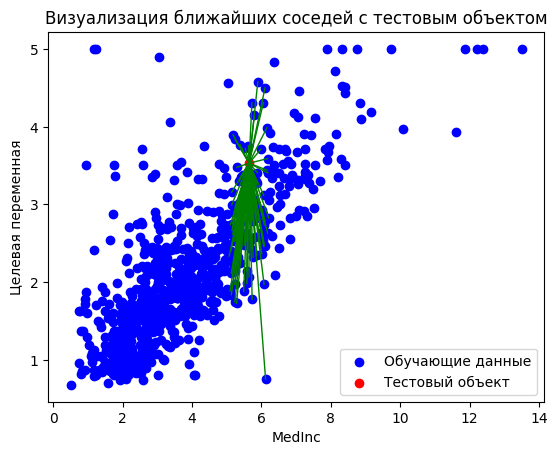

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train['MedInc'], y_train, color='blue', label='Обучающие данные')

plt.scatter(test_point['MedInc'], true_value, color='red', label='Тестовый объект')

for i in range(len(indices[0])):
    plt.plot([test_point['MedInc'], X_train.iloc[indices[0][i]]['MedInc']],
             [true_value, y_train[indices[0][i]]],
             color='green', lw=1)

plt.legend()
plt.xlabel('MedInc')
plt.ylabel('Целевая переменная')
plt.title('Визуализация ближайших соседей с тестовым объектом')
plt.show()

## 6. Еще одна задача регрессии

### Получение данных

Будем работать с тем же самым набором данным `fetch_olivetti_faces` из `sklearn`, но уже для задачи регрессии - будем восстанавливать изображение.

In [ ]:
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [ ]:
n_pixels = data.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]


X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

Вот один пример обучающей пары.

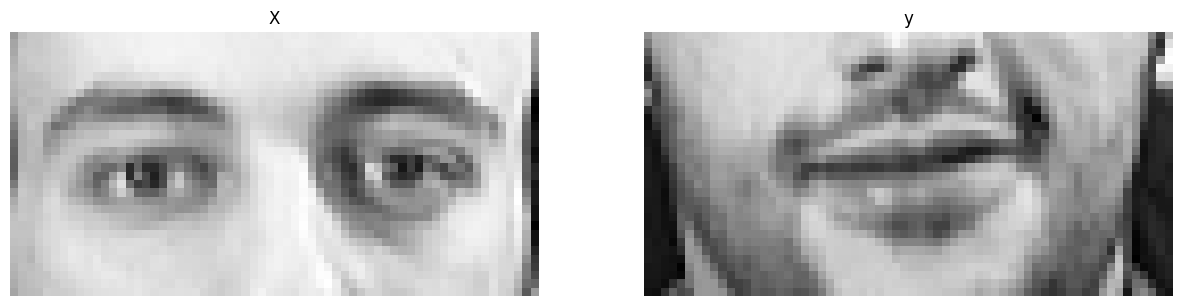

In [ ]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx].reshape((32, 64)), cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx].reshape((32, 64)), cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

#### 6.1. Обучите модель KNN и назовите переменную с моделью knn на 100 соседях

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100)

#### 6.2. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом knn.


In [ ]:
pred_test = {'knn': None,
             'weighted_knn': None,
             'weighted_knn_custom': None}

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

knn_preds = knn.predict(X_test)

pred_test['knn'] = knn_preds

rmse_knn = np.sqrt(mean_squared_error(y_test, knn_preds))
print(f"RMSE для KNN: {rmse_knn}")

RMSE для KNN: 0.12627972662448883


#### 6.3. Обучите модель KNN с весами по дистанции и назовите переменную с моделью weighted_knn на 100 соседях

In [ ]:
weighted_knn = KNeighborsRegressor(n_neighbors=100, weights='distance')
weighted_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100, weights='distance')

#### 6.4. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом weighted_knn.


In [ ]:
weighted_knn_preds = weighted_knn.predict(X_test)

pred_test['weighted_knn'] = weighted_knn_preds

rmse_weighted_knn = np.sqrt(mean_squared_error(y_test, weighted_knn_preds))
print(f"RMSE для Weighted KNN: {rmse_weighted_knn}")


RMSE для Weighted KNN: 0.12370381888076908


#### 6.5. Напишите свою функцию подсчета весов по дистанции

(Можете выбрать любой подход)


In [ ]:
def custom_weight(distances):
    return 1 / (distances + 1e-5)


#### 6.6. Обучите модель KNN с кастомными весами по дистанции и назовите переменную с моделью weighted_knn_custom на 100 соседях

In [ ]:
weighted_knn_custom = KNeighborsRegressor(n_neighbors=100, weights=custom_weight)
weighted_knn_custom.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=100,
                    weights=<function custom_weight at 0x7e3e70bf39a0>)

#### 6.7. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом weighted_knn_custom.


In [ ]:
weighted_knn_custom_preds = weighted_knn_custom.predict(X_test)

pred_test['weighted_knn_custom'] = weighted_knn_custom_preds

rmse_weighted_knn_custom = np.sqrt(mean_squared_error(y_test, weighted_knn_custom_preds))
print(f"RMSE для Custom Weighted KNN: {rmse_weighted_knn_custom}")


RMSE для Custom Weighted KNN: 0.1237038260486434


А сейчас отрисуем все предсказания.

In [ ]:
ESTIMATORS = {'knn': knn,
              'weighted_knn': weighted_knn,
              'weighted_knn_custom': weighted_knn_custom}

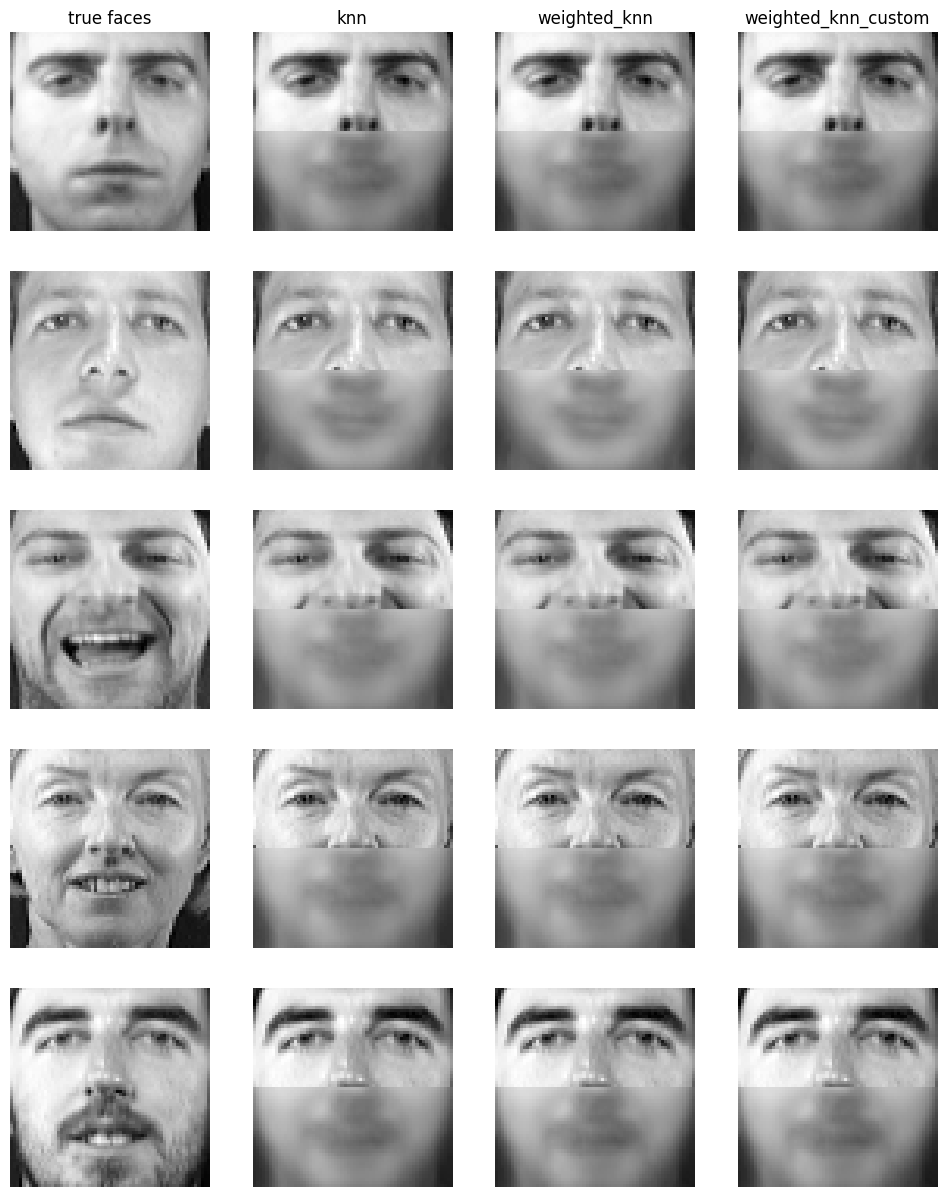

In [ ]:
n_faces = 5
n_cols = 1 + len(ESTIMATORS)
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))

for i in range(5):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], pred_test[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)
        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()

#### 7*. Подберите лучшие гиперпараметры для модели, используя метод [GridSearchCV](https://scikit-learn.org/stable/modules/grid_search.html)

Примеры использования можно найти в технической документации, предыдущей работе, а также в следующих источниках:

[Пример 1](https://machinelearningknowledge.ai/knn-classifier-in-sklearn-using-gridsearchcv-with-example/#vii_Model_fitting_with_K-cross_Validation_and_GridSearchCV)


[Пример 2](https://vc.ru/ml/147132-kak-avtomaticheski-podobrat-parametry-dlya-modeli-mashinnogo-obucheniya-ispolzuem-gridsearchcv)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

param_grid = {
    'n_neighbors': [5, 10, 20, 50, 100],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

knn = KNeighborsRegressor()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_

pred_test['best_knn'] = best_knn.predict(X_test)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


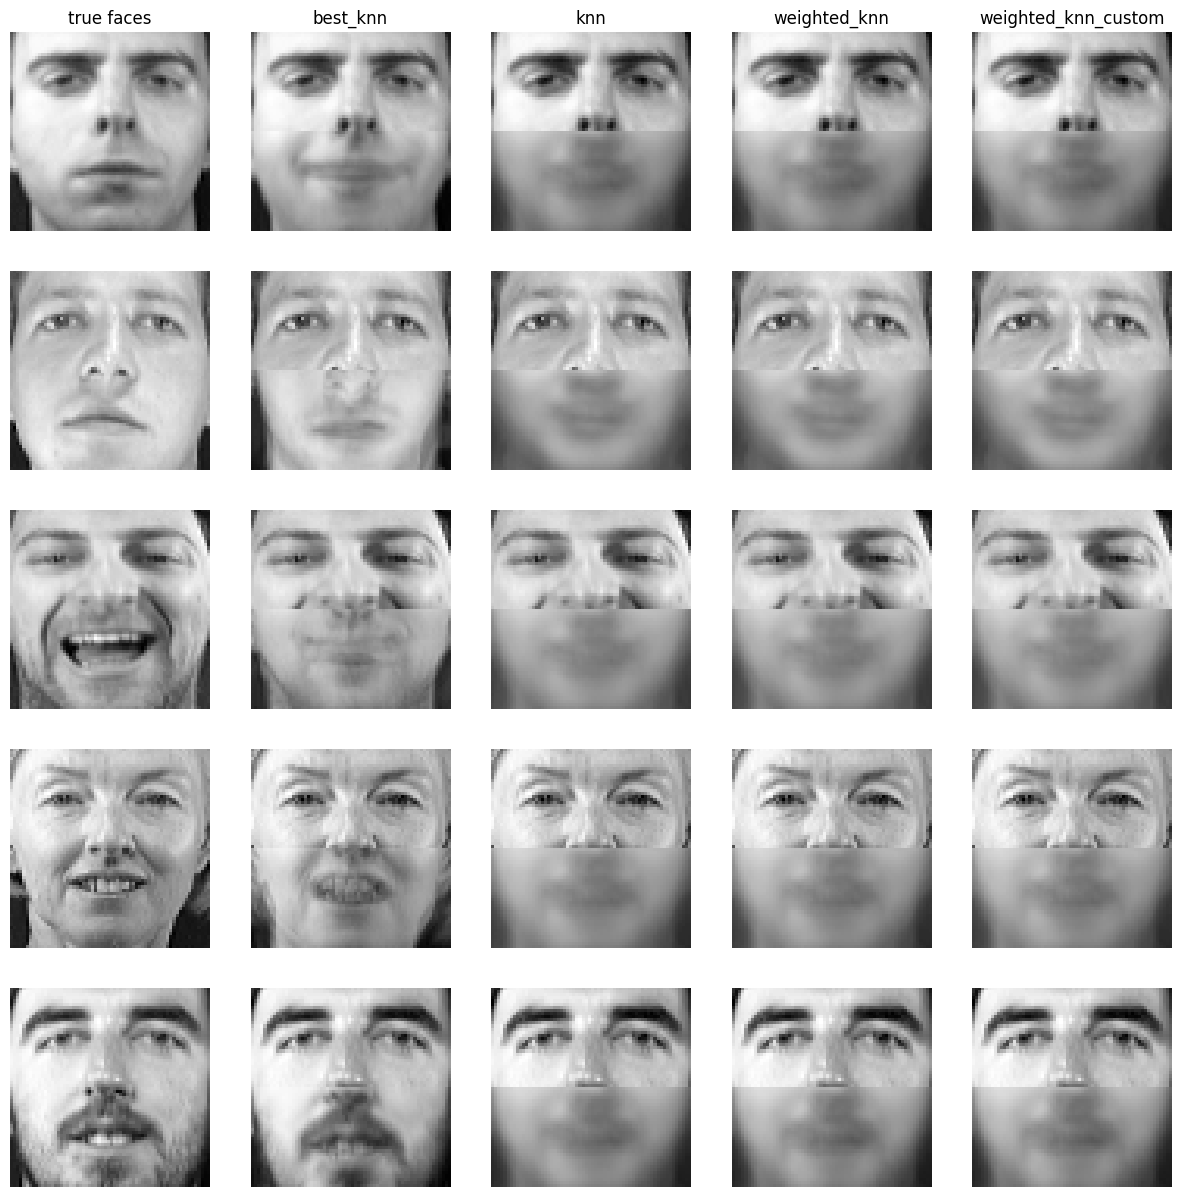

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ESTIMATORS = {
    'knn': knn,
    'weighted_knn': weighted_knn,
    'weighted_knn_custom': weighted_knn_custom,
    'best_knn': best_knn
}

n_faces = 5
n_cols = 1 + len(ESTIMATORS)
image_shape = (64, 64)

plt.figure(figsize=(3 * n_cols, 3 * n_faces))

for i in range(5):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], pred_test[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)
        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest")

plt.show()
